<a href="https://colab.research.google.com/github/ben8169/Project/blob/main/2%EC%B0%A8_AI%E1%84%80%E1%85%B5%E1%84%89%E1%85%A1%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#바른 설치하기
!curl -LJks -H "uname:$(uname -a)" https://bareun.ai/api/get -o bareun-linux.deb
!uname -a
!dpkg -i bareun-linux.deb

#텐서플로우 설치
!curl -O https://storage.googleapis.com/tensorflow/libtensorflow/libtensorflow-gpu-linux-x86_64-2.9.1.tar.gz
!tar -C /opt/bareun -xzf libtensorflow-gpu-linux-x86_64-2.9.1.tar.gz


#환경 설정하기
%env BAREUN_ROOT="/opt/bareun"
%env LD_LIBRARY_PATH="/opt/bareun/lib"
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" nohup /opt/bareun/bin/bareun&

#API 키 등록. (바른 홈페이지에서 API를 미리 발급받아야 함.) 
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" /opt/bareun/bin/bareun -reg koba-T7GEKCI-HPDEKQI-SAIPJQQ-N5ATGNA

#pip 패키지 설치
!pip install -U bareunpy



Linux 54370c0aba0b 5.15.107+ #1 SMP Sat Apr 29 09:15:28 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux
(Reading database ... 122542 files and directories currently installed.)
Preparing to unpack bareun-linux.deb ...
Unpacking bareun (2.0.4) over (2.0.4) ...
Setting up bareun (2.0.4) ...
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
Created symlink /etc/systemd/system/multi-user.target.wants/bareun.service → /etc/systemd/system/bareun.service.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  392M  100  392M    0     0   103M      0  0:00:03  0:00:03 --:--:--  103M
env: BAREUN_ROOT="/opt/bareun"
env: LD_LIBRARY_PATH="/opt/bareun/lib"
nohup: appending output to 'nohup.out'
Use config file: /opt/b

In [16]:
import sys
import bareunpy as brn
import google.protobuf.text_format as tf
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

API_KEY = "koba-T7GEKCI-HPDEKQI-SAIPJQQ-N5ATGNA"
t = brn.Tagger(API_KEY, "localhost", 5656)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("/content/drive/MyDrive/google.txt",'r') as f:
  google_titles = f.read().split('\n')
google_titles

In [20]:
k = [i.strip() for i in google_titles]

  #1.일반명사 추출 및 빈도집계
res = t.tags(k)        
m = res.msg()
pa = res.pos()
nng_list = [ x for x, y in pa if y == 'NNG']
print(nng_list) 

#2.추출된 명사의 빈도 집계 --> top 20 추출하여 확인
c_nng = Counter(nng_list)
sort_nng = []
for a, b in c_nng.items():
  sort_nng = sort_nng + [(b, a)]
sort_nng.sort(reverse=True)
print(sort_nng[:20])            


word = [ b for a, b in sort_nng[:20]]
freq = [ a for a, b in sort_nng[:20]]
pd.DataFrame( {'단어': word, '횟수': freq } )

newindex = [ i + 1 for i in range(20)]
print(pd.DataFrame( {'단어': word, '횟수': freq }, index=newindex))


['생각', '영화', '인공', '지능', '시대', '챗봇', '인공', '지능', '도시', '인공', '지능', '대표', '도시', '남동', '발전', '인공', '지능', '기반', '입찰', '담합', '포착', '시스템', '도입', '과기정통부', '인공', '지능', '윤리', '신뢰', '강화', '추진', '경향', '눈', '인공', '지능', '사람', '인간', '보완', '대체', '내달', 'ICA', 'IH', '개최', '웹', '인공', '지능', '몸', '인공', '지능', '일상', '변화', '실존', '위험', '인공', '지능', '사람', '육군', '본부', '기반', '국방', '혁신', '포럼', '성료', '국방', '분야', '기술', '적용', '교류', '결과', '인공', '지능', '설명', '특허', '뉴스', '책임감', '인공', '지능', '혁신', '주요', '기업', '회의', '탄소', '배출량', '관리', '인공', '지능', '오후두시랩', '기반', '탄소', '중립', 'SaaS', '플랫폼', '그린플로', '출시', '랠리', '수혜주', '국방부', '국방', '인공', '지능', '센터', '창설', '국방', '센터', '추진단', '출범', '인공', '지능', '로봇', '시대', '국민', '통합', '정책', '인공', '지능', '인공', '지능', '위험', '오픈', '오픈', '주간', '인공', '지능', '포커스', '기사', '본문', '인공', '지능', '기반', 'MOIA', '자율', '주행', '서비스', '탑승객', '관리', '시스템', '개발', '괴물', '전', '‥', '규제', '기업', '음성', '지능', '챗GPT', '토킹', 'GPT', '개발', '프리', '토킹', '발음', '평가', '지원', '인공', '지능', '민주', '가치', '지수', '연속', '등급', '달성', '인공', '지능', '대체재'

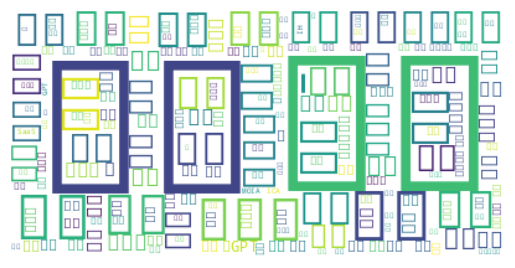

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

[0.0897560975609756, 0.08780487804878048, 0.011707317073170732, 0.00975609756097561, 0.00878048780487805, 0.007804878048780488, 0.006829268292682927, 0.006829268292682927, 0.006829268292682927, 0.006829268292682927]


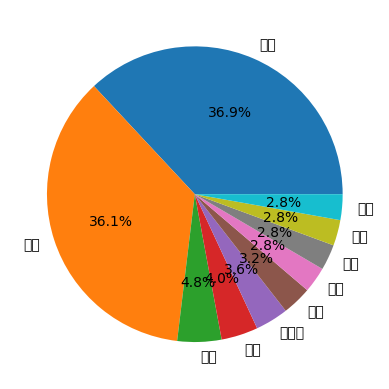

In [21]:

# 3.워드클라우드 생성
wordcloud = WordCloud( background_color='white')
wordcloud.generate_from_frequencies(c_nng)

# 워드클라우드 출력
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#4.상대빈도 추출 및 시각화
N = len(nng_list)
word_top10 = word[:10]
freq_top10 = freq[:10]
ratio = [i/N for i in freq_top10]
print(ratio)
plt.pie(ratio, labels = word_top10, autopct='%.1f%%')
plt.show()